### Datasets
    - gdsc --> gg
    - ctrp --> cc
### Models
    - lgb
    - nn0
    - nn1

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from load_modules import *
%matplotlib inline
fpath = Path(os.getcwd())
print('Current path:', fpath)

outpath = fpath/'outpath'
os.makedirs(outpath, exist_ok=True)

Current path: /vol/ml/apartin/projects/dr-learning-curves/nbs


## Path to data

In [ ]:
fname = 'all_scores.csv'
# dpath = Path('../lc.out')
dpath = Path('../lc.out.July2020.gov-meeting')
# dpath = Path('../lc.out.summit.July2020/exp_1_and_2')

# dirs = sorted(dpath.glob('*'))
dirs = glob(str(dpath/'*'))
print(dirs)

In [ ]:
# c_lgb_path = dpath/'lc.ctrp.lgb.default'/fname
# c_lgb_path = dpath/dirs[0]/fname
# g_lgb_path = dpath/dirs[1]/fname

# GDSC
# nn0_path = Path(dpath, 'lc.gdsc.nn_reg0.ls_hpo', fname); src='gdsc'; model='nn0'
# nn1_path = Path(dpath, 'lc.gdsc.nn_reg1.ls_hpo', fname); src='gdsc'; model='nn1'
# lgb_path = Path(dpath, 'lc.gdsc.lgb', fname); src='ctrp'; model='lgb'
# lgb_path = Path(dpath, 'lc.gdsc.lgb.ls_hpo', fname); src='ctrp'; model='lgb'

# # GDSC1
# exp_name = 'gdsc1.nn0_vs_nn1'
# nn0_path = Path(dpath, 'lc.gdsc1.nn_reg0.ls_hpo', fname); src='gdsc1'; model='nn0'; label_nn0='GDSC1; Single'
# nn1_path = Path(dpath, 'lc.gdsc1.nn_reg1.ls_hpo', fname); src='gdsc1'; model='nn1'; label_nn1='GDSC1; Multi'
# lgb_path = None

# # GDSC2
# exp_name = 'gdsc2.nn0_vs_nn1'
# nn0_path = Path(dpath, 'lc.gdsc2.nn_reg0.ls_hpo', fname); src='gdsc2'; model='nn0'; label_nn0='GDSC2; Single'
# nn1_path = Path(dpath, 'lc.gdsc2.nn_reg1.ls_hpo', fname); src='gdsc2'; model='nn1'; label_nn1='GDSC2; Multi'
# lgb_path = None

# GDSC1 vs GDSC2; nn1
exp_name = 'gdsc1_vs_gdsc2.nn1'
nn0_path = Path(dpath, 'lc.gdsc1.nn_reg1.ls_hpo', fname); src='gdsc1'; model='GDSC1; nn1'; label_nn0='GDSC1; Multi'
nn1_path = Path(dpath, 'lc.gdsc2.nn_reg1.ls_hpo', fname); src='gdsc2'; model='GDSC2; nn1'; label_nn1='GDSC2; Multi'
lgb_path = None

# CTRP
# exp_name = 'ctrp.nn0_vs_nn1'
# nn0_path = Path(dpath, 'lc.ctrp.nn_reg0.ls_hpo', fname); src='ctrp'; model='nn0'; label_nn0='CTRP; Single'
# nn1_path = Path(dpath, 'lc.ctrp.nn_reg1.ls_hpo', fname); src='ctrp'; model='nn1'; label_nn1='CTRP; Multi'
# lgb_path = Path('../lc.out.ctrp.lgb/lc.ctrp.lgb.dflt', fname)
# lgb_path = Path(dpath, 'lc.ctrp.lgb', fname); src='ctrp'; model='lgb'
# lgb_path = Path(dpath, 'lc.ctrp.lgb.ls_hpo', fname); src='ctrp'; model='lgb'

# NCI60
# nn0_path = Path(dpath, 'lc.nci60.nn_reg0.ls_hpo', fname); src='nci60'; model='nn0'
# nn1_path = Path(dpath, 'lc.nci60.nn_reg1.ls_hpo', fname); src='nci60'; model='nn1'

# NCI60
# exp_name = 'nci60.nn0_vs_nn1'
# nn0_path = Path(dpath, f'lc.nci60.nn_reg0.random.ls_hpo', fname); src='nci60'; label_nn0='NCI60; Single'
# nn1_path = Path(dpath, f'lc.nci60.nn_reg1.random.ls_hpo', fname); src='nci60'; label_nn1='NCI60; Multi'
# lgb_path = Path('../lc.out.nci60.lgb/lc.nci60.lgb.dflt', fname); src='nci60'; model='lgb'

## Load data

In [4]:
# data = load_data(path, tr_set='te');
# print('data.shape', data.shape)
# display( data[(data.set=='te') & (data.metric=='mean_absolute_error')] )

In [5]:
def get_data(path, tr_set='te'):
    if path is None:
        return None
    else:
        return load_data(path, tr_set=tr_set);
        
# nn0 = load_data(nn0_path, tr_set='te');
# nn1 = load_data(nn1_path, tr_set='te');
# lgb = load_data(lgb_path, tr_set='te');

nn0 = get_data(nn0_path, tr_set='te');
nn1 = get_data(nn1_path, tr_set='te');
lgb = get_data(lgb_path, tr_set='te');

In [6]:
def print_count(aa):
    # aa = nn0_rnd
    aa['one'] = 1
    aa = aa[(aa['set']=='te') & (aa['metric']=='mean_absolute_error')]
    display(aa.groupby(['tr_size']).agg({'one': 'sum'}).sort_values('tr_size').reset_index())
    
# print_count(aa=nn0)
# print_count(aa=nn1)
# print_count(aa=lgb_hpo)
# print_count(aa=lgb)

In [7]:
nn1

,run,tr_size,set,metric,score
0,run1,10000,te,r2,0.721882
1,run1,13475,te,r2,0.744482
2,run1,18158,te,r2,0.746215
3,run1,24470,te,r2,0.761741
4,run1,32974,te,r2,0.786730
...,...,...,...,...,...
58,run1,18158,te,y_avg_pred,0.755930
59,run1,24470,te,y_avg_pred,0.750751
60,run1,32974,te,y_avg_pred,0.751945
61,run1,44435,te,y_avg_pred,0.748052


## Raw plots

In [8]:
# Global plotting params
# ----------------------
met = 'mean_absolute_error'

t_set = 'te'
xtick_scale = 'log2'
ytick_scale = 'log2'
# xtick_scale = 'linear'
# ytick_scale = 'linear'

kwargs = {'metric_name': met,
          'xtick_scale': xtick_scale,
          'ytick_scale': ytick_scale}

In [9]:
# # Plot all raw
# # -------------------------------
# kwargs = {'metric_name': met,
#           'tr_set': t_set,
#           'xtick_scale': xtick_scale,
#           'ytick_scale': ytick_scale,
#           'plot_median': True}

# kwargs.update({'title': f'{src} ~ {model}'})
# ax = lc_plots.plot_lc_single_metric(data, **kwargs);

# df = data[ data['metric']==met ].reset_index(drop=True)
# print(f'Total points for {met}: {len(df)}')

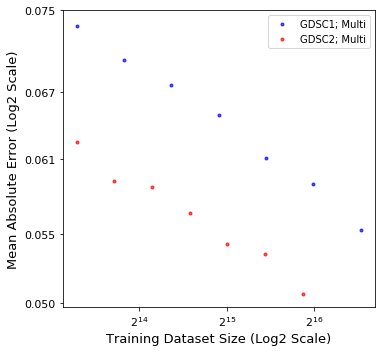

In [12]:
# Plot
# -------------------------------
save = False
ax = None

if nn0 is not None:
    nn0 = nn0[nn0.metric==met].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=nn0['tr_size'].values, y=nn0['score'].values, color='b', label=label_nn0, **kwargs, ax=ax);
    # ax = lc_plots.plot_lc_single_metric(nn0, **kwargs, ax=ax);

if nn1 is not None:
    nn1 = nn1[nn1.metric==met].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=nn1['tr_size'].values, y=nn1['score'].values, color='r', label=label_nn1, **kwargs, ax=ax);
    # ax = lc_plots.plot_lc_single_metric(nn1, **kwargs, ax=ax);

if lgb is not None:
    lgb = lgb[lgb.metric==met].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=lgb['tr_size'].values, y=lgb['score'].values, color='m', label='lgb', **kwargs, ax=ax);
    
ax.grid(False)
plt.tight_layout()
plt.legend(loc='best')
    
if save:
    plt.savefig(outpath/(exp_name+'.png'), dpi=150)

## Fit and extrapolate

In [72]:
def fit_data(df, x_fit_mn=0, x_fit_mx=None):
    if df is None:
        return None
    
    df = df[ df['metric']==met ].reset_index(drop=True)
    df['y'] = df['score']
    df = df[df['metric']==met].groupby('tr_size').agg({'y': 'median'}).reset_index()
    
    dfit = subset_data(df, col='tr_size', x_mn=x_fit_mn, x_mx=x_fit_mx)
    dfit = add_weight_col( dfit )
    return dfit

In [76]:
# Choose the dataset
# data = nn0
# data = nn1
data = lgb
df = data

# ----------------
# Prepare the data
# ----------------
df = df[ df['metric']==met ].reset_index(drop=True)
print('Raw dataset of scores', df.shape)

# Agg scores
df['y'] = df['score']
df = df[df['metric']==met].groupby('tr_size').agg({'y': 'median'}).reset_index()
print('Agg with median', df.shape)

# Split dfit and dext
# x_fit_mn = 100000
# x_fit_mx = 200000

# Split dfit and dext
x_fit_mn = 10000
# x_fit_mx = 600000
x_fit_mx = 680000
# x_fit_mx = None

dfit = subset_data(df, col='tr_size', x_mn=x_fit_mn, x_mx=x_fit_mx)
dext = subset_data(df, col='tr_size', x_mn=x_fit_mx, x_mx=None)
dfit = add_weight_col( dfit )

print('dfit.shape:', dfit.shape)
print('dext.shape:', dext.shape)
print('Train size (dfit):', dfit['tr_size'].unique())
print('Train size (dext):', dext['tr_size'].unique())

Raw dataset of scores (1000, 6)
Agg with median (50, 2)
dfit.shape: (32, 3)
dext.shape: (0, 2)
Train size (dfit): [ 11113  12687  14484  16536  18878  21552  24605  28090  32069  36612
  41798  47718  54477  62194  71003  81061  92542 105651 120615 137700
 157204 179471 204892 233914 267047 304873 348056 397356 453639 517895
 591251 674999]
Train size (dext): []


In [77]:
# # Fit and extrap (nlsLM)
# # ----------------------------------
# # Use each set of the extreme points to fit a model
# coefs = fit_model(dfit['tr_size'], dfit['y'], dfit['w'])
# dfit['fit'] = calc_fit(dfit['tr_size'], coefs)
# dext['fit'] = calc_fit(dext['tr_size'], coefs)
# print(dfit['fit'].values)
# print(dext['fit'].values)

# Fit and extrap (old)
# ----------------------------------
prms = fit_params(x=dfit['tr_size'].values, y=dfit['y'].values)
yf = biased_powerlaw(dfit['tr_size'].values, **prms)
ye = biased_powerlaw(dext['tr_size'].values, **prms)
dfit['fit'] = yf
dext['fit'] = ye
# print(yf)
# print(ye)

In [83]:
dfit
# dfit.tail()

,tr_size,y,w,fit
0,11113,0.061280,0.016464,0.061510
1,12687,0.060520,0.018796,0.060743
2,14484,0.060045,0.021458,0.060071
3,16536,0.059485,0.024498,0.059482
4,18878,0.059134,0.027967,0.058965
5,21552,0.058630,0.031929,0.058513
6,24605,0.058310,0.036452,0.058116
7,28090,0.057766,0.041615,0.057769
8,32069,0.057567,0.047510,0.057464
9,36612,0.057279,0.054240,0.057198


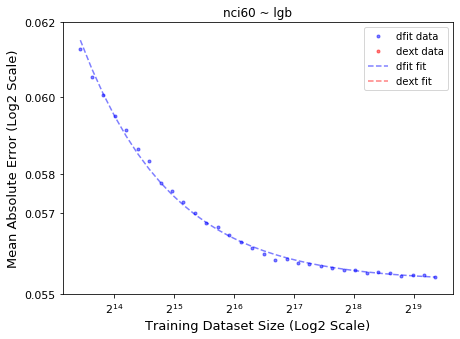

In [79]:
ax = None

pnts_args = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'alpha': 0.5, 'ls': '', 'marker': '.'}
fit_args = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'alpha': 0.5, 'ls': '--', 'marker': ''}

xf = dfit['tr_size'].values
xe = dext['tr_size'].values
yf_raw = dfit['y'].values
ye_raw = dext['y'].values
yf_fit = dfit['fit'].values
ye_fit = dext['fit'].values

# Raw data
ax = lc_plots.plot_lc(x=xf, y=yf_raw, ax=ax, **pnts_args, color='b', label='dfit data')
ax = lc_plots.plot_lc(x=xe, y=ye_raw, ax=ax, **pnts_args, color='r', label='dext data')

# Fits
ax = lc_plots.plot_lc(x=xf, y=yf_fit, ax=ax, **fit_args, color='b', label='dfit fit')
ax = lc_plots.plot_lc(x=xe, y=ye_fit, ax=ax, **fit_args, color='r', label='dext fit')

ax.set_title(f'{src} ~ {model}')
ax.legend(frameon=True, fontsize=10, loc='best')
ax.grid(False)

In [82]:
yf_fit

array([0.0615105 , 0.06074322, 0.06007083, 0.05948151, 0.05896525,
       0.05851281, 0.05811631, 0.05776891, 0.05746447, 0.05719767,
       0.05696391, 0.05675908, 0.05657958, 0.05642228, 0.05628445,
       0.05616366, 0.05605783, 0.05596508, 0.05588382, 0.0558126 ,
       0.05575019, 0.05569551, 0.05564759, 0.0556056 , 0.0555688 ,
       0.05553656, 0.0555083 , 0.05548354, 0.05546185, 0.05544284,
       0.05542618, 0.05541158])

In [80]:
pnts_args = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'alpha': 0.5, 'ls': '', 'marker': '.'}
fit_args = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'alpha': 0.5, 'ls': '--', 'marker': ''}

xf = dfit['tr_size'].values
xe = dext['tr_size'].values
yf = dfit['y'].values
ye = dext['y'].values

In [81]:
cc = FitPwrLaw(xf=dfit['tr_size'].values, yf=dfit['y'].values, w=dfit['w'].values)
xf_plot, yf_plot = cc.calc_fit( x1=xf[0], x2=xf[-1] )
xe_plot, ye_plot = cc.calc_fit( x1=xe[0], x2=xe[-1] )

# Reset axes
ax = None

# Raw data
ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color='b', label='dfit data')
ax = lc_plots.plot_lc(x=xe, y=ye, ax=ax, **pnts_args, color='r', label='dext data')

# Fits
ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color='b', label='dfit fit')
ax = lc_plots.plot_lc(x=xe_plot, y=ye_plot, ax=ax, **fit_args, color='r', label='dext fit')

ax.set_title(f'{src} ~ {model}')
ax.legend(frameon=True, fontsize=10, loc='best')
ax.grid(False)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [38]:
cc.coefs

,coef,est,se,t_val,p_val
0,a,0.247055,0.797759,0.309686,0.764712
1,b,-0.038596,0.225098,-0.171464,0.868116
2,c,-0.116659,0.921982,-0.126531,0.902434


## Filtering

df.shape (2880, 5)


,run,tr_size,set,metric,score
0,run_104,128,te,r2,0.052339
1,run_104,253,te,r2,0.066318


df.shape (1082, 5)


,run,tr_size,set,mean_absolute_error,r2
0,run_0,988,te,0.081754,0.381946
1,run_0,1954,te,0.070105,0.541345


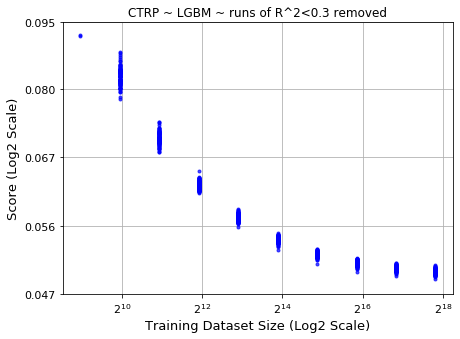

In [8]:
# Remove scores (trainings that didn't converge)
# ----------------------------------------------
df = data.copy()

r2_th = 0.3
df = df[(df['metric']==met) | (df['metric']=='r2')].reset_index(drop=True)
print('df.shape', df.shape)
display(df[:2])

df = pd.pivot_table(df, values='score', index=['run', 'tr_size', 'set'], columns='metric').reset_index()
df.columns.name = None
df = df[ df['r2']>r2_th ].reset_index(drop=True)
print('df.shape', df.shape)
display(df[:2])

x = df['tr_size'].values
y = df[met].values
lc_plots.plot_lc(x, y, ls='', title=f'{src} ~ {model} ~ runs of R^2<{r2_th} removed');

df.shape (1440, 5)


,tr_size,med,sd,sd_top
0,128,0.107185,0.002965,0.110150
1,253,0.102445,0.002529,0.104974
2,500,0.094382,0.002214,0.096597
3,988,0.082567,0.001855,0.084422
4,1954,0.070310,0.001103,0.071413
5,3862,0.062341,0.000626,0.062967
6,7635,0.057225,0.000505,0.057730
7,15093,0.054146,0.000403,0.054550
8,29835,0.052078,0.000340,0.052418
9,58976,0.050933,0.000327,0.051260


df.shape (1199, 7)


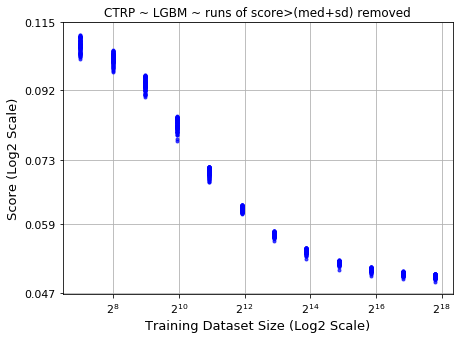

In [9]:
# Remove vertical 'outliers' (filter on std)
# ------------------------------------------
df = data.copy()
df = df[ df['metric']==met ].reset_index(drop=True)
print('df.shape', df.shape)

# Agg scores
agg = df.copy()
agg['sd'] = agg['score']
agg['med'] = agg['score']
agg = agg[agg['metric']==met].groupby('tr_size').agg({'med': 'median', 'sd': 'std'}).reset_index()
agg['sd_top'] = agg['med'] + agg['sd']
display(agg)

# Filter on sd
dct = { agg.loc[i, 'tr_size']: agg.loc[i, 'sd_top'] for i in range(len(agg)) } # key: tr_size, value: sd_top
df['sd_top'] = df['tr_size'].map(lambda x: dct[x])
df['good_sd'] = [True if df.loc[i,'score'] <= df.loc[i,'sd_top'] else False for i in range(len(df))]
df = df[ df['good_sd']==True ].reset_index(drop=True)
print('df.shape', df.shape)

x = df['tr_size'].values
y = df['score'].values
lc_plots.plot_lc(x, y, ls='', title=f'{src} ~ {model} ~ runs of score>(med+sd) removed');

## Fitting

In [10]:
# p_value_min = 0.05
p_value_min = 0.2

In [11]:
# Split dfit and dext
# -------------------
df = data.copy()
df = df[ df['metric']==met ].reset_index(drop=True)

x_fit_mn = 200
x_fit_mx = 40000

dfit = subset_data(df, col='tr_size', x_mn=x_fit_mn, x_mx=x_fit_mx)
dext = subset_data(df, col='tr_size', x_mn=x_fit_mx, x_mx=None)
dfit = add_weight_col(dfit)

print('dfit.shape:', dfit.shape)
print('dext.shape:', dext.shape)

print('Train size (dfit):', dfit['tr_size'].unique())
print('Train size (dext):', dext['tr_size'].unique())

dfit.shape: (960, 6)
dext.shape: (360, 5)
Train size (dfit): [  253   500   988  1954  3862  7635 15093 29835]
Train size (dext): [ 58976 116578 230441]


In [12]:
# Fit single run
# --------------
# run_name = 'run_104'
# data_fit = dfit[ dfit['run'] == run_name ].reset_index(drop=True)
# display(data_fit)

# xf = data_fit['tr_size'].values
# yf = data_fit['score'].values
# w  = data_fit['w'].values
# coef_est = fit_model(xf, yf, w)

# coef_est['valid'] = coef_est['p_val'].map(lambda x: True if x <= p_value_min else False)
# coef_est['run'] = run_name
# coef_est

In [13]:
# Fit model for each run (set of samples)
# ---------------------------------------
coef_est_df = []
for run_name in dfit['run'].unique():
    data_fit = dfit[ dfit['run'] == run_name ].reset_index(drop=True)
    
    # At least 3 fitting points are required
    if len(data_fit) < 4: continue
        
    xf = data_fit['tr_size'].values
    yf = data_fit['score'].values
    w  = data_fit['w'].values
    coef_est = fit_model(xf, yf, w)
    
    coef_est['valid'] = coef_est['p_val'].map(lambda x: True if x <= p_value_min else False)
    coef_est['run'] = run_name
    
    coef_est_df.append(coef_est)
    
coef_est_df = pd.concat(coef_est_df, axis=0).reset_index(drop=True)
print('coef_est_df.shape', coef_est_df.shape)
display( coef_est_df[:3] )

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: tibble

R[write to console]: Loading required package: minpack.lm



coef_est_df.shape (360, 7)


,coef,est,se,t_val,p_val,valid,run
0,a,1.072827,0.259563,4.133207,9.056669e-03,True,run_104
1,b,-0.501116,0.040603,-12.341905,6.184719e-05,True,run_104
2,c,0.045830,0.001311,34.956259,3.604779e-07,True,run_104


In [14]:
# Determine runs with good and bad runs fits
# ------------------------------------------
dfit['fit'] = -100
dext['fit'] = -100

for run_name in dfit['run'].unique():
    # Get the sizes and coefs for a run
    coefs = coef_est_df.loc[coef_est_df['run'] == run_name, :].reset_index(drop=True)
    
    # Skip fits if "valid" are NaN
    if coefs['valid'].isna().sum() == 3: continue
    
    # Skip fits with bad estimates
    if coefs['valid'].sum() != 3: continue

    # Est scores
    ids = dfit['run'] == run_name
    dfit.loc[ids, 'fit'] = calc_fit(dfit.loc[ids,'tr_size'].values, coefs)

    ids = dext['run'] == run_name
    dext.loc[ids, 'fit'] = calc_fit(dext.loc[ids,'tr_size'].values, coefs)

In [15]:
# Good and bad runs based for dfit
# --------------------------------
bad_ids = dfit['fit'] == -100
dfit_bad = dfit.loc[bad_ids, :]
dfit_good = dfit.loc[~bad_ids, :]
bad_runs = dfit_bad['run'].unique()
good_runs = dfit_good['run'].unique()

print(dfit_bad.shape)
print(dfit_good.shape)

# Good and bad runs based for dext
# --------------------------------
# dext_bad <- dext[dext$fit==-100,]
# dext_ <- dext[dext$fit>-100,]
# good_run_ext <- as.vector(unique(dext_$run))
# bad_run_ext <- as.vector(unique(dext_bad$run))

(0, 7)
(960, 7)


In [17]:
plot_args = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'alpha': 0.3, 'ls': '', 'marker': '.'}

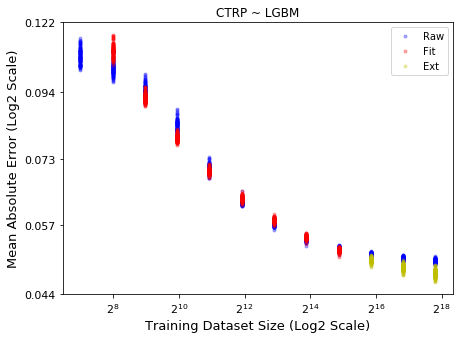

In [18]:
ax = None

df = data[data['metric']==met].reset_index(drop=True)
x = df['tr_size'].values
y = df['score'].values
ax = lc_plots.plot_lc(x=x, y=y, ax=ax, **plot_args, color='b', label='Raw')

x = dfit['tr_size'].values
y = dfit['fit'].values
ax = lc_plots.plot_lc(x=x, y=y, ax=ax, **plot_args, color='r', label='Fit')

x = dext['tr_size'].values
y = dext['fit'].values
ax = lc_plots.plot_lc(x=x, y=y, ax=ax, **plot_args, color='y', label='Ext')

ax.set_title(f'{src} ~ {model}')
ax.legend(frameon=True, fontsize=10, loc='best')
ax.grid(False)

## Calc CI

In [19]:
# Find the extreme points per tr_sz (min and max)
# -----------------------------------------------

# Method 1
# --------
# dfit_pivot = pd.pivot_table(dfit, values='score', index=['tr_size'], columns='run').reset_index()
# dfit_pivot.columns.name = None

# df = dfit_pivot.copy()
# ci_lwr = pd.DataFrame({'tr_size': df['tr_size'].values, 'y': df.iloc[:,1:].min(axis=1)})
# ci_upr = pd.DataFrame({'tr_size': df['tr_size'].values, 'y': df.iloc[:,1:].max(axis=1)})
# ci_lwr = add_weight_col(ci_lwr)
# ci_upr = add_weight_col(ci_upr)

# Method 2
# --------
ci_lwr = dfit[['tr_size', 'score']]
ci_lwr = ci_lwr.groupby('tr_size').agg({'score': 'min'}).reset_index().rename(columns={'score': 'y'})
ci_lwr = add_weight_col(ci_lwr)

ci_upr = dfit[['tr_size', 'score']]
ci_upr = ci_upr.groupby('tr_size').agg({'score': 'max'}).reset_index().rename(columns={'score': 'y'})
ci_upr = add_weight_col(ci_upr)

In [20]:
# Calc CI (using the extreme points)
# ----------------------------------
# Use each set of the extreme points to fit a model
ci_lwr_coefs = fit_model(ci_lwr['tr_size'], ci_lwr['y'], ci_lwr['w'])
ci_upr_coefs = fit_model(ci_upr['tr_size'], ci_upr['y'], ci_upr['w'])
ci_lwr['fit'] = calc_fit(ci_lwr['tr_size'], ci_lwr_coefs)
ci_upr['fit'] = calc_fit(ci_upr['tr_size'], ci_upr_coefs)


In [22]:
# Extrapolate CI curves
# ---------------------
ci_lwr_ext = pd.DataFrame( {'tr_size': dext['tr_size'].unique()} )
ci_upr_ext = pd.DataFrame( {'tr_size': dext['tr_size'].unique()} )
ci_lwr_ext['fit'] = calc_fit(ci_lwr_ext['tr_size'], ci_lwr_coefs)
ci_upr_ext['fit'] = calc_fit(ci_upr_ext['tr_size'], ci_upr_coefs)

In [23]:
pnts_args = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'alpha': 0.3, 'ls': '', 'marker': '.'}
ci_args = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'alpha': 0.3, 'ls': '--', 'marker': '.'}

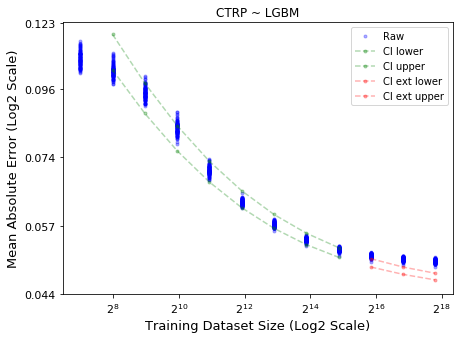

In [24]:
ax = None

df = data[data['metric']==met].reset_index(drop=True)
x = df['tr_size'].values
y = df['score'].values
ax = lc_plots.plot_lc(x=x, y=y, ax=ax, **pnts_args, color='b', label='Raw')

x = ci_lwr['tr_size'].values
y = ci_lwr['fit'].values
ax = lc_plots.plot_lc(x=x, y=y, ax=ax, **ci_args, color='g', label='CI lower')

x = ci_upr['tr_size'].values
y = ci_upr['fit'].values
ax = lc_plots.plot_lc(x=x, y=y, ax=ax, **ci_args, color='g', label='CI upper')

x = ci_lwr_ext['tr_size'].values
y = ci_lwr_ext['fit'].values
ax = lc_plots.plot_lc(x=x, y=y, ax=ax, **ci_args, color='r', label='CI ext lower')

x = ci_upr_ext['tr_size'].values
y = ci_upr_ext['fit'].values
ax = lc_plots.plot_lc(x=x, y=y, ax=ax, **ci_args, color='r', label='CI ext upper')

ax.set_title(f'{src} ~ {model}')
ax.legend(frameon=True, fontsize=10, loc='best')
ax.grid(False)